## 1. Import neccessory packages
##### pip install pandas matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import and Read the dataset 

In [2]:
# Imort the dataset from a URL
dataset = 'https://github.com/sivasathish889/employee_data/raw/main/employee_data.csv'

# Load the dataset
df = pd.read_csv(dataset)

df.shape


(500, 9)

## 3. Get the Information using info() 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EmployeeID          500 non-null    object
 1   Name                500 non-null    object
 2   Age                 500 non-null    int64 
 3   Gender              500 non-null    object
 4   Department          500 non-null    object
 5   YearsAtCompany      500 non-null    int64 
 6   PerformanceScore    500 non-null    int64 
 7   MonthlyHoursWorked  500 non-null    int64 
 8   ProjectsCompleted   500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB
None


## 4. Check the missing values

In [4]:
# Check missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 EmployeeID            0
Name                  0
Age                   0
Gender                0
Department            0
YearsAtCompany        0
PerformanceScore      0
MonthlyHoursWorked    0
ProjectsCompleted     0
dtype: int64


## 5. Check the duplicate values

In [5]:
df.duplicated().sum() 


np.int64(0)

## 6. Group by department and describe the YearsAtCompany column

In [6]:
ss = df.groupby('Department')['YearsAtCompany'].describe()  


## 7. Average performance by department

In [7]:

dept_perf = df.groupby('Department')['PerformanceScore'].mean().sort_values(ascending=False)
print("Average performance by department:\n", dept_perf)

df[df['Department']=='PerformanceScore']


Average performance by department:
 Department
HR             3.208791
Engineering    3.183908
Marketing      3.144578
Sales          2.961039
Finance        2.948718
Support        2.892857
Name: PerformanceScore, dtype: float64


,EmployeeID,Name,Age,Gender,Department,YearsAtCompany,PerformanceScore,MonthlyHoursWorked,ProjectsCompleted


## 8. Plot performance by department

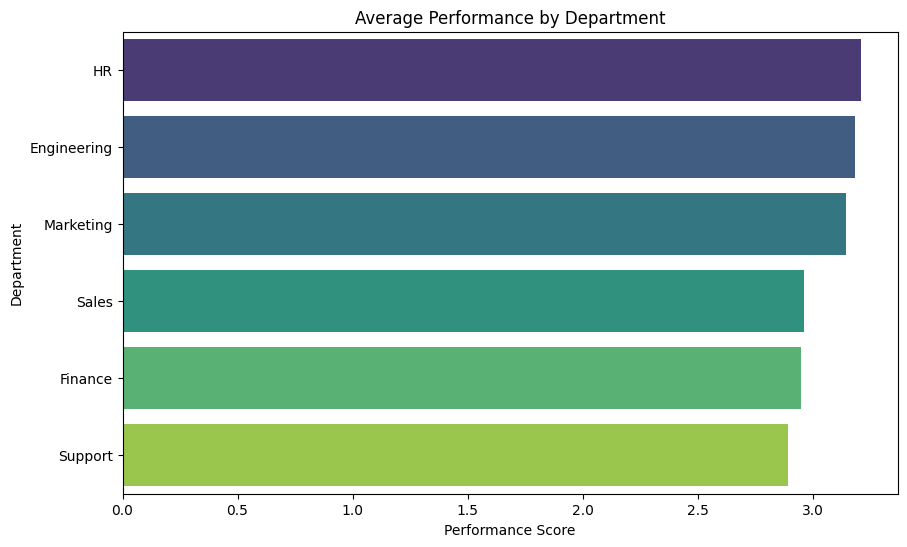

In [8]:

plt.figure(figsize=(10,6))
sns.barplot(x=dept_perf.values, y=dept_perf.index, palette='viridis', hue=dept_perf.index)
plt.title('Average Performance by Department')
plt.xlabel('Performance Score')
plt.ylabel('Department')
plt.show()

## 9. Productivity vs Experience


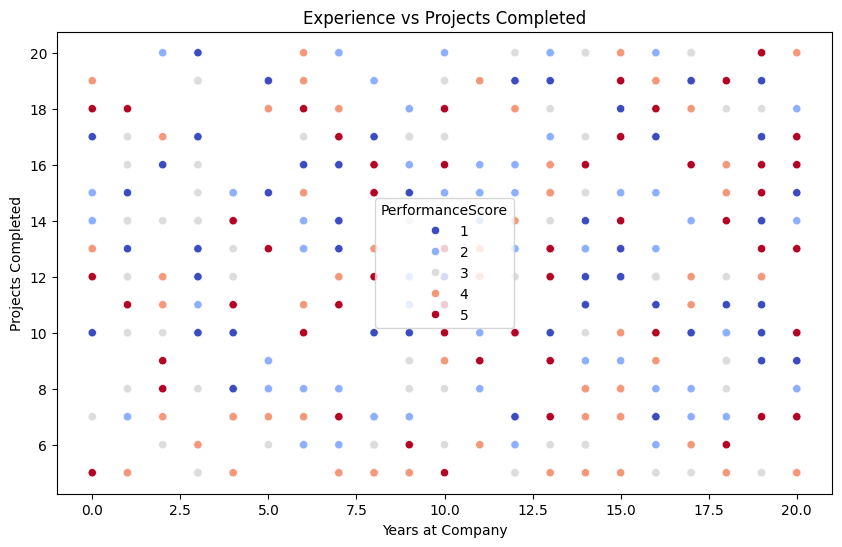

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearsAtCompany', y='ProjectsCompleted', hue='PerformanceScore', palette='coolwarm')
plt.title('Experience vs Projects Completed')
plt.xlabel('Years at Company')
plt.ylabel('Projects Completed')
plt.show()

## 10. Monthly hours vs Performance


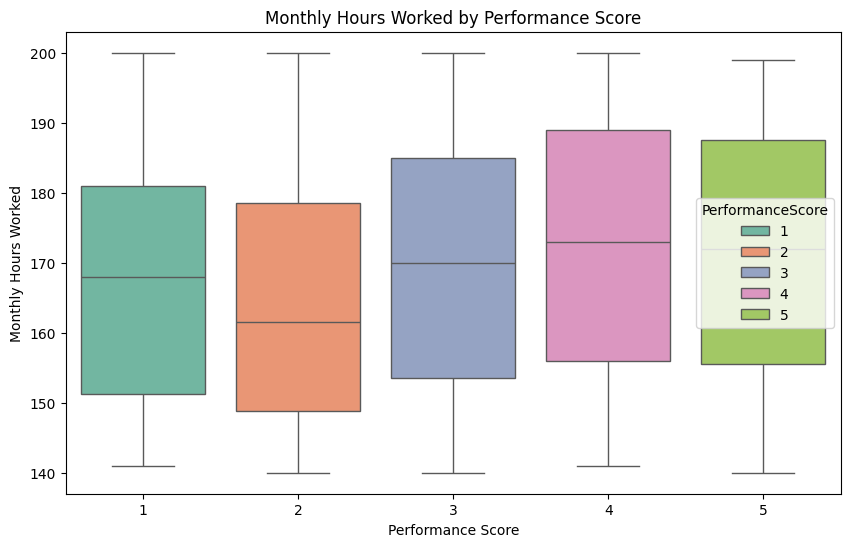

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PerformanceScore', y='MonthlyHoursWorked', data=df, palette='Set2',hue='PerformanceScore')
plt.title('Monthly Hours Worked by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Monthly Hours Worked')
plt.show()


## 11. Correlation matrix


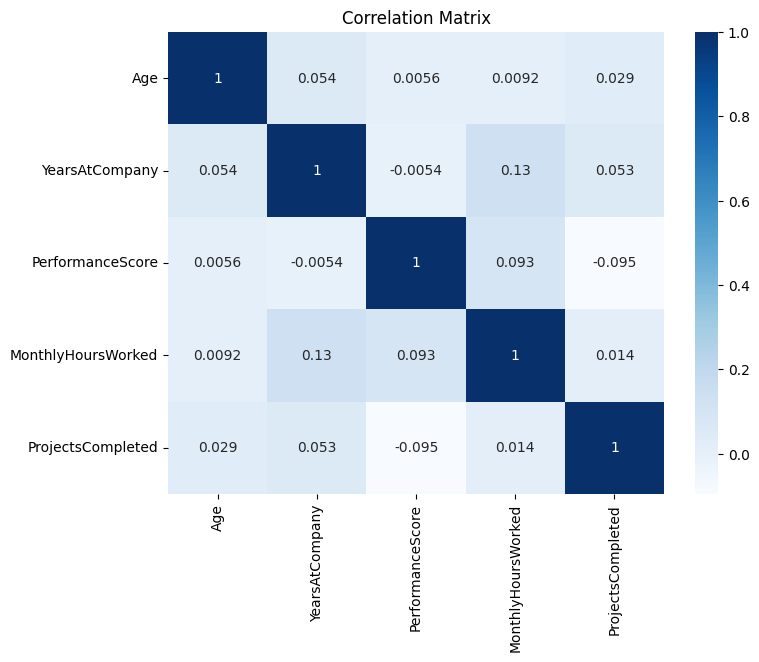

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age', 'YearsAtCompany', 'PerformanceScore', 'MonthlyHoursWorked', 'ProjectsCompleted']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## 12. High performers analysis and Save the summary

In [12]:

high_perf = df[df['PerformanceScore'] >= 4]
print("High performers breakdown by department:\n", high_perf['Department'].value_counts())

# Save summary
summary = df.groupby('Department').agg({
    'PerformanceScore': 'mean',
    'ProjectsCompleted': 'sum',
    'MonthlyHoursWorked': 'mean'
}).reset_index()

summary.to_csv('department_summary.csv', index=False)


High performers breakdown by department:
 Department
HR             42
Marketing      41
Engineering    38
Support        33
Finance        30
Sales          28
Name: count, dtype: int64
